## 0. Libraries 📚

In [1]:
import pandas as pd

## 1. Load data 📥

#### a. Load vars csv data including new CIE10 diagnosis not labeled

[Página consulta CIE10 Diagnósticos](https://www.eciemaps.sanidad.gob.es/browser/diagnosticos)

In [2]:
from utils import read_cie10_file


cie10_map = read_cie10_file("data/diagnosticos_tipos.csv")
cie10_map

{'EJEIDiagnóstico': 'EJE I Diagnóstico',
 'F30.9': 'Episodio maníaco, no especificado',
 'F31.0': 'Trastorno bipolar, episodio actual hipomaníaco',
 'F31.1': 'Trastorno bipolar, episodio actual maníaco sin síntomas psicóticos',
 'F31.3': 'Trastorno bipolar, episodio actual depresivo, gravedad leve o moderada',
 'F31.81': 'Trastorno bipolar II',
 'F31.9': 'Trastorno bipolar, no especificado',
 'F32.9': 'Episodio depresivo sin especificación',
 'F33.9': 'Trastorno depresivo mayor, recurrente, no especificado',
 'F34.0': 'Trastorno ciclotímico',
 'F34.1': 'Trastorno distímico',
 'F39.0': 'Trastorno del estado de ánimo [afectivo], no especificado',
 'F40.9': 'Trastorno de ansiedad fóbica sin especificación',
 'F40.0': 'Trastornos de ansiedad fóbica',
 'F41.0': 'Trastorno de pánico (ansiedad episódica paroxismal)',
 'F41.1': 'Trastorno de ansiedad generalizada',
 'F41.2': 'Trastorno mixto ansioso-depresivo',
 'F42.0': 'Trastorno obsesivo-compulsivo',
 'F43.0': 'Reacción al stress grave y tr

### b. Load diagnoses data

In [ ]:
clasificator_df = pd.read_csv("data/EJEI_nocod_Clasificator_2024_07_ 04. 4.fin.csv")
clasificator_df

,EJEIDiagnóstico,REVISADO,altas_capacidades,No_DX,F30.9,F31.0,F31.1,F31.3,F31.81,F31.9,...,F13,F14,F17,F19,F20,F21,F22,F25,F29,F32.3
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,1,,,1,,,,,,...,,,,,,,,,,
1,\r\nDescompensación rasgos patológicos de pers...,1,,,,,,,,,...,,,,,,,,,,
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,1,,,,,,,,,...,,,,,,,,,,
3,Episodio depresivo moderado. A valorar según e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Intento de suicidio,1,,,,,,1,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",1126.0,,,,,,,,,...,1,,,,,,,,,
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",1126.0,,,,,,,,,...,,1,1,,,,,,1,
145510,T ansiedad con insomnio plurifactorial.,1515.0,,,,,,,,,...,,,,,,,,,,
145511,"- T. de ansiedad con insomnio comórbido, en re...",1515.0,,,,,,,,,...,,,,,,,,,,


## 2. Prepare columns 🧱

### 2.1 Convert diagnosis One Hot Columns to a list of codes

In [7]:
diagnosticos_df = clasificator_df.copy()
diagnosticos_df["Codigos_diagnosticos"] = diagnosticos_df.iloc[:, 2:].apply(lambda row: [col for col in diagnosticos_df.columns[2:] if row[col] == "1"], axis=1)
diagnosticos_df = diagnosticos_df[["EJEIDiagnóstico", "REVISADO", "Codigos_diagnosticos"]]
diagnosticos_df.rename(columns={
    "EJEIDiagnóstico": "Descripcion_diagnosticos",
    "REVISADO": "Revisado"
}, inplace=True)
diagnosticos_df

,Descripcion_diagnosticos,Revisado,Codigos_diagnosticos
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,1,[F30.9]
1,\r\nDescompensación rasgos patológicos de pers...,1,"[F60.3, F79]"
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,1,[]
3,Episodio depresivo moderado. A valorar según e...,NaN,[]
4,Intento de suicidio,1,"[F31.3, F32.9, T14.91]"
...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",1126.0,"[F4, F41.1, F60.4, COGNITIV, F13]"
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",1126.0,"[F32.9, F33.9, F60.3, Z63, F12, F14, F17, F29]"
145510,T ansiedad con insomnio plurifactorial.,1515.0,"[F4, F51.0]"
145511,"- T. de ansiedad con insomnio comórbido, en re...",1515.0,"[F4, F51.0]"


In [8]:
from utils import clean_cie10_code

def fix_fx_codes(codes):
    return [clean_cie10_code(code) for code in codes]

diagnosticos_df["Codigos_diagnosticos"] = diagnosticos_df["Codigos_diagnosticos"].apply(fix_fx_codes)
diagnosticos_df

,Descripcion_diagnosticos,Revisado,Codigos_diagnosticos
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,1,[F30.9]
1,\r\nDescompensación rasgos patológicos de pers...,1,"[F60.3, F79.0]"
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,1,[]
3,Episodio depresivo moderado. A valorar según e...,NaN,[]
4,Intento de suicidio,1,"[F31.3, F32.9, T14.91]"
...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",1126.0,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]"
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",1126.0,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0..."
145510,T ansiedad con insomnio plurifactorial.,1515.0,"[F4.0, F51.0]"
145511,"- T. de ansiedad con insomnio comórbido, en re...",1515.0,"[F4.0, F51.0]"


### 2.2 Column dignosis names list

In [9]:
diagnosticos_df["Diagnosticos_estandar"] = diagnosticos_df["Codigos_diagnosticos"].apply(lambda cods: [cie10_map[c] for c in cods])
diagnosticos_df

,Descripcion_diagnosticos,Revisado,Codigos_diagnosticos,Diagnosticos_estandar
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,1,[F30.9],"[Episodio maníaco, no especificado]"
1,\r\nDescompensación rasgos patológicos de pers...,1,"[F60.3, F79.0]",[Trastorno de inestabilidad emocional de la pe...
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,1,[],[]
3,Episodio depresivo moderado. A valorar según e...,NaN,[],[]
4,Intento de suicidio,1,"[F31.3, F32.9, T14.91]","[Trastorno bipolar, episodio actual depresivo,..."
...,...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",1126.0,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",1126.0,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[Episodio depresivo sin especificación, Trasto..."
145510,T ansiedad con insomnio plurifactorial.,1515.0,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145511,"- T. de ansiedad con insomnio comórbido, en re...",1515.0,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."


In [10]:
# Filter and print values starting with "F" followed by a number
filtered_values = diagnosticos_df["Diagnosticos_estandar"].apply(lambda codes: [code for code in codes if code.startswith("F") and code[1:].isdigit()])
unique_values = set([code for sublist in filtered_values for code in sublist])

if len(unique_values) > 0:
    print(unique_values)
else:
    print("No CIE codes without name.")

No CIE codes without name.


## 3. Cleaning 🧹

### 3.1 Convert 'Revisado' column to boolean

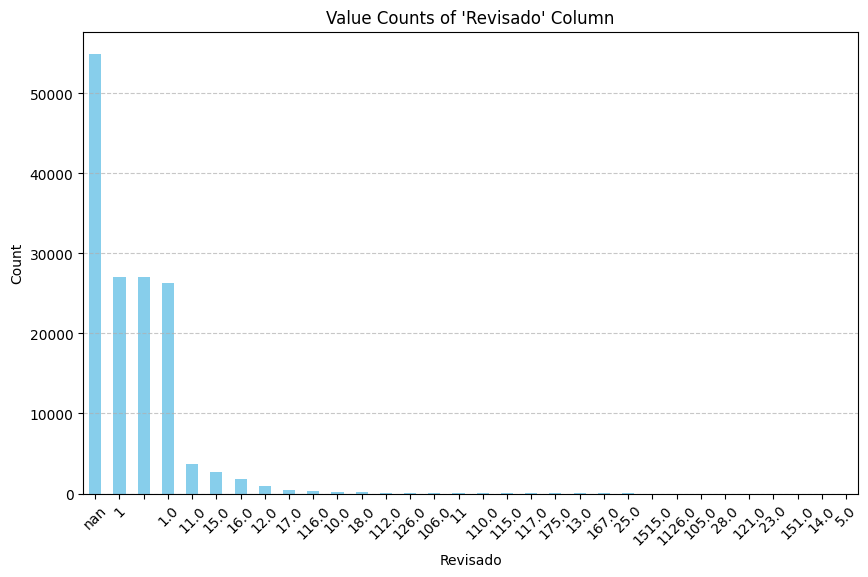

In [11]:
import matplotlib.pyplot as plt

# Get the value counts
value_counts = diagnosticos_df["Revisado"].value_counts(dropna=False)

# Plot the value counts
value_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Value Counts of 'Revisado' Column")
plt.xlabel("Revisado")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
diagnosticos_df.loc[:, "Revisado"] = diagnosticos_df["Revisado"].notna()
diagnosticos_df

,Descripcion_diagnosticos,Revisado,Codigos_diagnosticos,Diagnosticos_estandar
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,True,[F30.9],"[Episodio maníaco, no especificado]"
1,\r\nDescompensación rasgos patológicos de pers...,True,"[F60.3, F79.0]",[Trastorno de inestabilidad emocional de la pe...
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,True,[],[]
3,Episodio depresivo moderado. A valorar según e...,False,[],[]
4,Intento de suicidio,True,"[F31.3, F32.9, T14.91]","[Trastorno bipolar, episodio actual depresivo,..."
...,...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",True,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",True,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[Episodio depresivo sin especificación, Trasto..."
145510,T ansiedad con insomnio plurifactorial.,True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145511,"- T. de ansiedad con insomnio comórbido, en re...",True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."


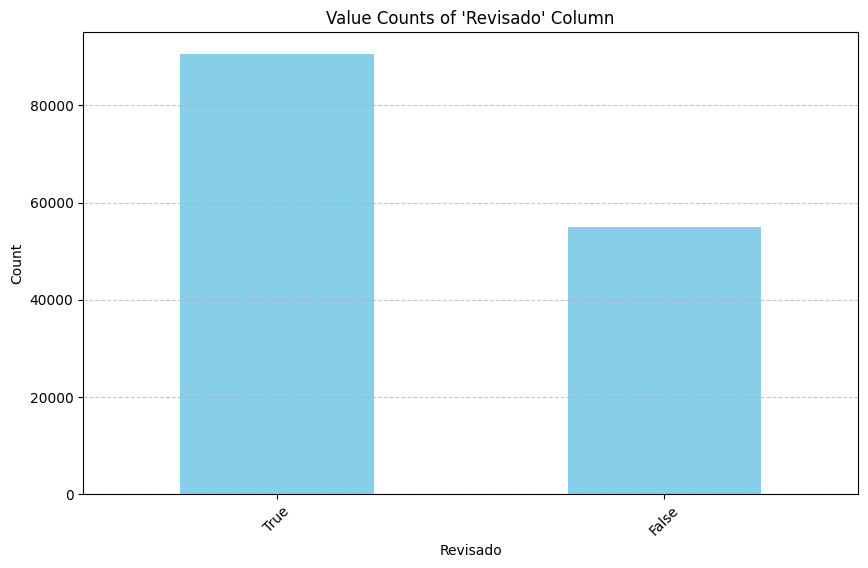

In [13]:
# Get the value counts
value_counts = diagnosticos_df["Revisado"].value_counts(dropna=False)

# Plot the value counts
value_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Value Counts of 'Revisado' Column")
plt.xlabel("Revisado")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.2 Clean 'Descripcion_diagnosticos'

In [14]:
import pandas as pd
import re
import unicodedata

def clean_text(text):
    # Convert to string and lowercase
    text = str(text).lower()

    # Remove accents and diacritics
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')

    # Replace newlines, tabs, and multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove special characters but keep letters, numbers, spaces, and periods
    text = re.sub(r'[^a-zñ0-9. ]', '', text)

    # Trim leading and trailing whitespace
    text = text.strip()

    return text

diagnosticos_df.insert(1, 'Descripcion_diagnosticos_limpio',diagnosticos_df['Descripcion_diagnosticos'].apply(clean_text).to_list())
diagnosticos_df

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Revisado,Codigos_diagnosticos,Diagnosticos_estandar
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,f30.2 mania con sintomas psicoticos.,True,[F30.9],"[Episodio maníaco, no especificado]"
1,\r\nDescompensación rasgos patológicos de pers...,descompensacion rasgos patologicos de personal...,True,"[F60.3, F79.0]",[Trastorno de inestabilidad emocional de la pe...
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,eje i diagnostico codificado 1 inadecuada util...,True,[],[]
3,Episodio depresivo moderado. A valorar según e...,episodio depresivo moderado. a valorar segun e...,False,[],[]
4,Intento de suicidio,intento de suicidio,True,"[F31.3, F32.9, T14.91]","[Trastorno bipolar, episodio actual depresivo,..."
...,...,...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",negativa a la ingesta agitacion y alteraciones...,True,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",eje i psicosis no especificada leve descompens...,True,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[Episodio depresivo sin especificación, Trasto..."
145510,T ansiedad con insomnio plurifactorial.,t ansiedad con insomnio plurifactorial.,True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145511,"- T. de ansiedad con insomnio comórbido, en re...",t. de ansiedad con insomnio comorbido en remis...,True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."


### 3.3 Remove useless rows

In [15]:
values_to_remove = ["",
                    "-", "--", "---",
                    ".", "..", "...",
                    "¿?",
                    "A estudio", "A ESTUDIO"]


diagnosticos_df = diagnosticos_df[~diagnosticos_df["Descripcion_diagnosticos_limpio"].isin(values_to_remove)]
diagnosticos_df

,Descripcion_diagnosticos,Descripcion_diagnosticos_limpio,Revisado,Codigos_diagnosticos,Diagnosticos_estandar
0,F30.2 - MANÍA CON SÍNTOMAS PSICÓTICOS.,f30.2 mania con sintomas psicoticos.,True,[F30.9],"[Episodio maníaco, no especificado]"
1,\r\nDescompensación rasgos patológicos de pers...,descompensacion rasgos patologicos de personal...,True,"[F60.3, F79.0]",[Trastorno de inestabilidad emocional de la pe...
2,\r\nEje I Diagnóstico Codificado 1: Inadecuada...,eje i diagnostico codificado 1 inadecuada util...,True,[],[]
3,Episodio depresivo moderado. A valorar según e...,episodio depresivo moderado. a valorar segun e...,False,[],[]
4,Intento de suicidio,intento de suicidio,True,"[F31.3, F32.9, T14.91]","[Trastorno bipolar, episodio actual depresivo,..."
...,...,...,...,...,...
145508,"-Negativa a la ingesta, agitación y alteracion...",negativa a la ingesta agitacion y alteraciones...,True,"[F4.0, F41.1, F60.4, COGNITIV, F13.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145509,"Eje I: \r\n-Psicosis no especificada, leve des...",eje i psicosis no especificada leve descompens...,True,"[F32.9, F33.9, F60.3, Z63, F12.0, F14.0, F17.0...","[Episodio depresivo sin especificación, Trasto..."
145510,T ansiedad con insomnio plurifactorial.,t ansiedad con insomnio plurifactorial.,True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."
145511,"- T. de ansiedad con insomnio comórbido, en re...",t. de ansiedad con insomnio comorbido en remis...,True,"[F4.0, F51.0]","[Trastorno de ansiedad, disociativo, relaciona..."


## 4. Store result 💾

### 4.1 Divide data in dataframes depending of the available data

In [16]:
no_ground_truth_df = diagnosticos_df[diagnosticos_df["Codigos_diagnosticos"].apply(lambda x: len(x) == 0)].copy()
ground_truth_df = diagnosticos_df[diagnosticos_df["Codigos_diagnosticos"].apply(lambda x: len(x) > 0)].copy()

print("Len no ground truth: ", len(no_ground_truth_df))
print("Len ground truth: ", len(ground_truth_df))

Len no ground truth:  57803
Len ground truth:  79048


### 4.2 Check if all ground truth are reviewed

In [17]:
all_reviewed = ground_truth_df["Revisado"].all()

if all_reviewed:
    print("All ground truth entries are reviewed.")
    ground_truth_df.drop(columns=["Revisado"], inplace=True)
else:
    print("Not all ground truth entries are reviewed.")

All ground truth entries are reviewed.


In [18]:
all_not_reviewed = (no_ground_truth_df["Revisado"] == False).all()

if all_not_reviewed:
    print("All no ground truth entries are not reviewed.")
    no_ground_truth_df.drop(columns=["Revisado"], inplace=True)
else:
    print("Not all no ground truth entries are are not reviewed.")

Not all no ground truth entries are are not reviewed.


### 4.3 Save result

In [19]:
no_ground_truth_df.to_csv("data/no_ground_truth_df.csv", index=False)
ground_truth_df.to_csv("data/ground_truth_df.csv", index=False)